In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import squarify
import random
from matplotlib import pyplot as plt
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv(r'Pokemon\Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
data.shape

(800, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
data['Type 2'].isnull().sum()/data.shape[0]*100

48.25

In [7]:
# 48% of pokemons doesn't have Second Type Attribute

In [8]:
data = data.drop(['#'],axis=1)

In [9]:
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [10]:
pokemon_features = data.describe().columns.tolist()

In [11]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [12]:
data['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [13]:
def bar_chart(groupby,col,data=data,p=['#0B486B']):
    data_to_plot = data.groupby([groupby])[col].count().sort_values(ascending=False).reset_index()
    x,y = data_to_plot[groupby], data_to_plot[col]
    plt.figure(figsize=(14,6))
    ax1 = sns.barplot(x=x,y=y,palette=p)
    sns.despine(bottom=True,left=True)
    ax1.set_ylabel('');
    ax1.set_xlabel('');
    for p in ax1.patches:
        ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
def pie_chart(col,data=data):
    #plt.figure(figsize=(15,6))
    my_circle=plt.Circle( (0,0), 0.83, color='white')
    names=data[col].value_counts().index.tolist()
    size=data[col].value_counts().values.tolist()
    plt.pie(size, labels=names, colors=random_colors(len(size)),autopct='%1.2f%%',startangle=35)
    p=plt.gcf()
    p.gca().add_artist(my_circle);
    plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
    
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

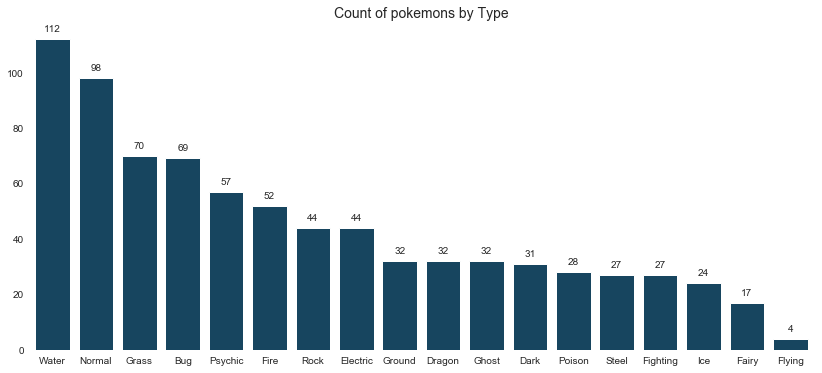

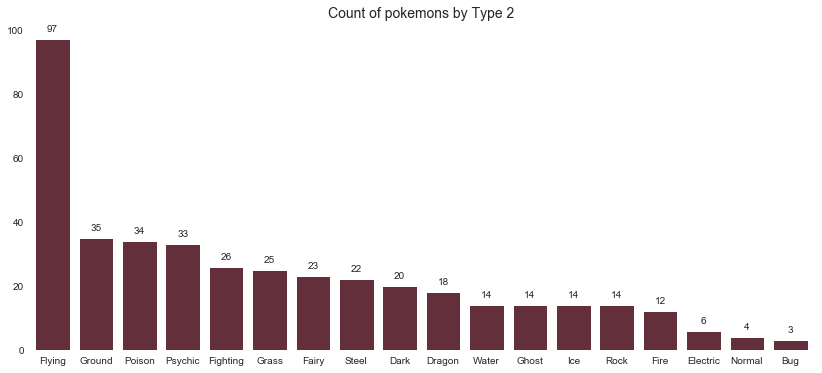

In [14]:
bar_chart('Type 1','Name',data)
plt.title('Count of pokemons by Type',fontsize=14);
bar_chart('Type 2','Name',data,p=['#6B2737'])
plt.title('Count of pokemons by Type 2',fontsize=14);

In [15]:
d1 = (data.groupby(['Type 1','Type 2'])['Name'].count()).reset_index().sort_values(by='Name',ascending=False)[:30]
d1['Types'] = d1['Type 1'] + '&' + d1['Type 2']

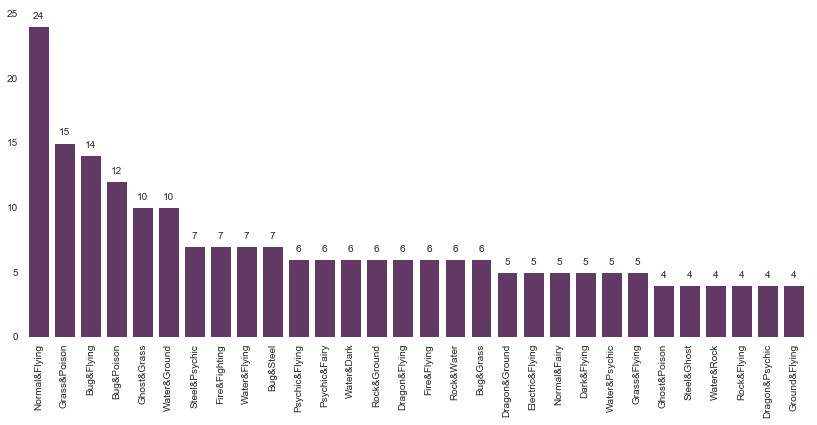

In [16]:
#d1
plt.figure(figsize=(14,6))
ax2 = sns.barplot(x='Types',y='Name', data=d1,palette=['#69306D'])
sns.despine(bottom=True,left=True)
ax2.set_ylabel('');
ax2.set_xlabel('');
plt.xticks(rotation=90)
for p in ax2.patches:
    ax2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [17]:
data.sample()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
447,Kricketune,Bug,NaN,384,77,85,51,55,51,65,4,False


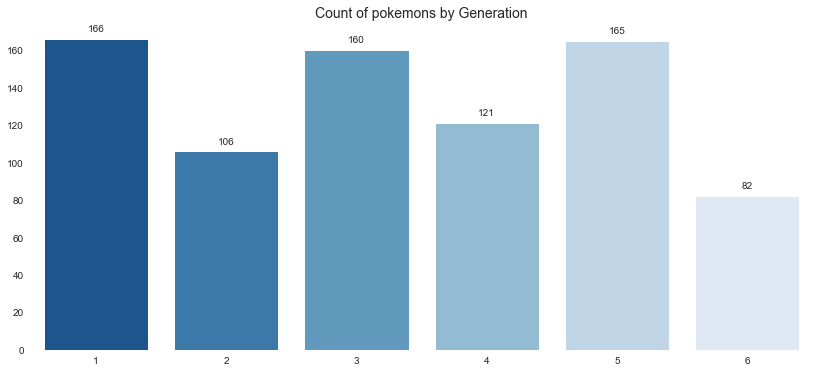

In [18]:
bar_chart('Generation','Name',data,p='Blues_r')
plt.title('Count of pokemons by Generation',fontsize=14);

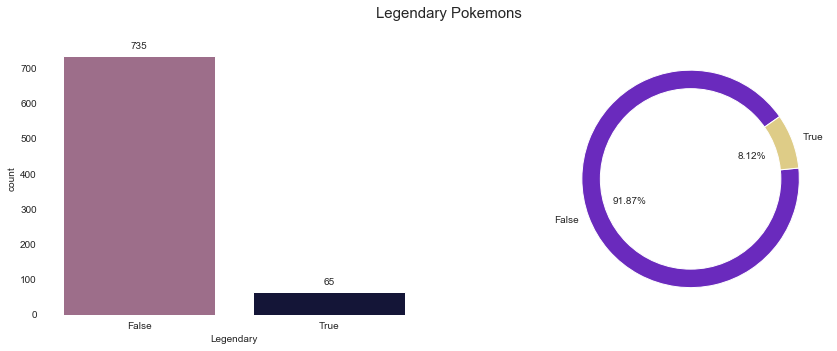

In [19]:
f, ax = plt.subplots(1,2,figsize=(15,5))
pie_chart('Legendary',data=data)
plt.suptitle('Legendary Pokemons',fontsize=15);
a3 = sns.countplot(data['Legendary'],ax=ax[0],palette=['#A5668B','#0E103D']);
sns.despine(bottom=True,left=True)
plt.ylabel('');
plt.xlabel('');
for p in a3.patches:
    a3.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Let's check Pokemon Stats

### Analysis of Health Points (HP)

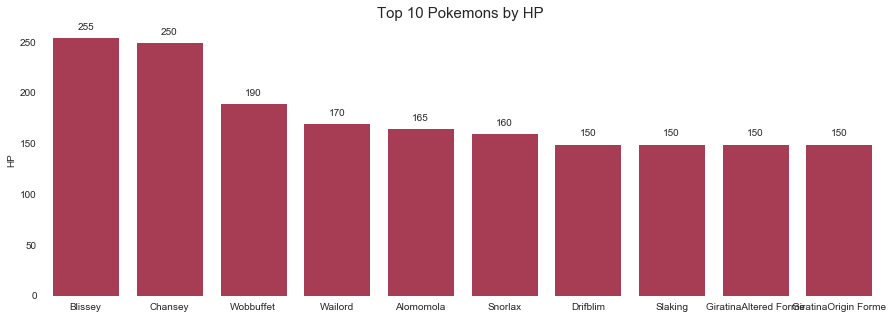

In [20]:
#data[['Name','HP']].sort_values(by='HP',ascending=False).head(10)
plt.figure(figsize=(15,5))
ax01 = sns.barplot(x=data[['Name','HP']].sort_values(by='HP',ascending=False).head(10)['Name'],
            y=data[['Name','HP']].sort_values(by='HP',ascending=False).head(10)['HP'],palette=['#b82b4b'])
sns.despine(bottom=True,left=True)
ax01.set_xlabel('');
for p in ax01.patches:
    ax01.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                 va='center', xytext=(0, 10), textcoords='offset points')
ax01.set_title('Top 10 Pokemons by HP ', fontsize=15);

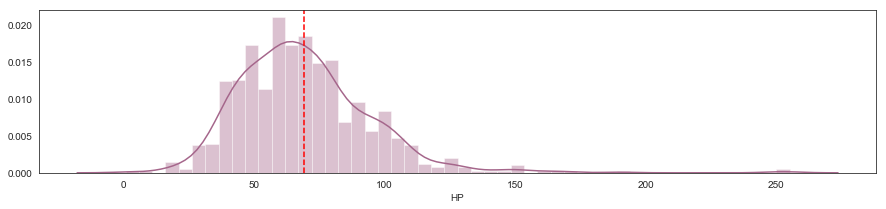

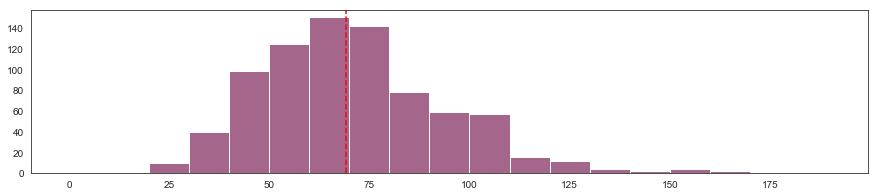

<Figure size 432x288 with 0 Axes>

In [21]:
f,ax = plt.subplots(figsize=(15,3))
h0 = sns.distplot(data['HP'],color='#A5668B',bins=50)
plt.axvline(data['HP'].mean(),linestyle='dashed',color='red')
plt.figure(figsize=(15,3))
h1 = plt.hist(data['HP'],color='#A5668B',bins=range(0,200,10))
plt.axvline(data['HP'].mean(),linestyle='dashed',color='red') 
plt.show()
plt.suptitle('Distribution of HP',fontsize=15);

,HP
count,800.000000
mean,69.258750
std,25.534669
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


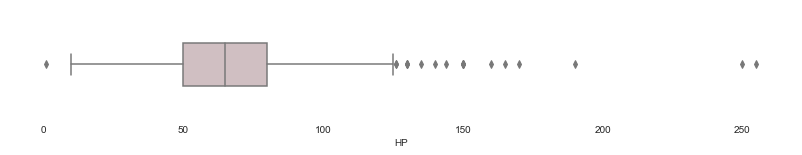

In [22]:
plt.figure(figsize=(14,2))
sns.boxplot(data['HP'],palette=['#D3BCC0'],width=0.4);
sns.despine(bottom=True,left=True)
data['HP'].describe().to_frame()

* Mean HP of pokemons: ~ 70 HP
* Max HP 255 
* 75% of pokemons are under 80 HP 

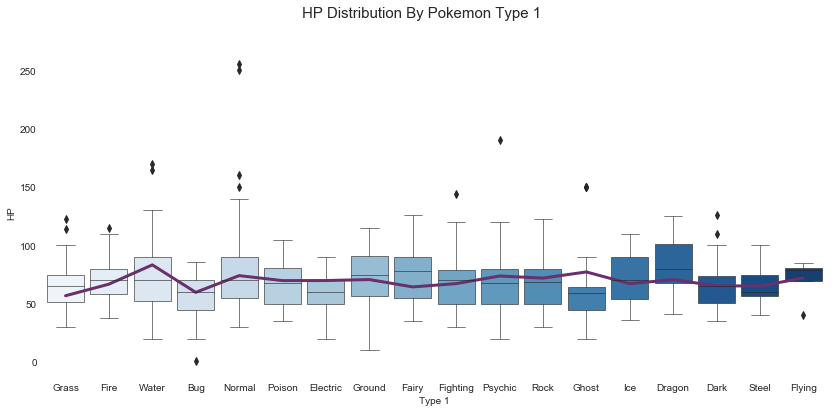

In [23]:
plt.figure(figsize=(14,6))
sns.boxplot(y=data['HP'],x=data['Type 1'],palette='Blues',width=0.85,linewidth=0.6);
sns.despine(bottom=True,left=True)
sns.lineplot(x='Type 1',y='HP',data=pd.DataFrame(data.groupby('Type 1')['HP'].mean()).reset_index(),color='#69306D',linewidth=3)
sns.despine(bottom=True,left=True)
plt.suptitle('HP Distribution By Pokemon Type 1',fontsize=15);

In [24]:
pd.DataFrame(data.groupby('Type 1')['HP'].mean()).T

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
HP,56.884058,66.806452,83.3125,59.795455,74.117647,69.851852,69.903846,70.75,64.4375,67.271429,73.78125,72.0,77.27551,67.25,70.631579,65.363636,65.222222,72.0625


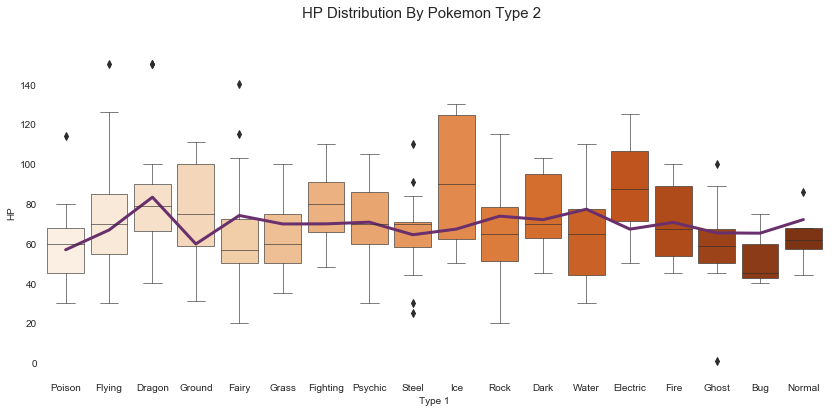

In [25]:
plt.figure(figsize=(14,6))
sns.boxplot(y=data['HP'],x=data['Type 2'],palette='Oranges',width=0.85,linewidth=0.6);
sns.despine(bottom=True,left=True)
sns.lineplot(x='Type 1',y='HP',data=pd.DataFrame(data.groupby('Type 1')['HP'].mean()).reset_index(),color='#69306D',linewidth=3)
sns.despine(bottom=True,left=True)
plt.suptitle('HP Distribution By Pokemon Type 2',fontsize=15);

In [26]:
pd.DataFrame(data.groupby('Type 2')['HP'].mean()).T

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
HP,53.333333,75.55,82.166667,88.166667,64.304348,79.461538,71.25,71.391753,59.142857,62.64,77.228571,90.0,63.5,58.764706,72.212121,68.071429,64.636364,62.714286


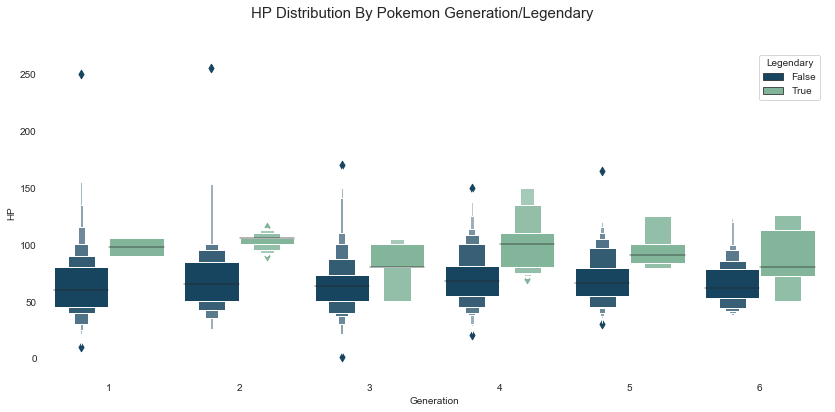

In [27]:
plt.figure(figsize=(14,6))
sns.boxenplot(y=data['HP'],x=data['Generation'],palette=['#0B486B','#79BD9A'],width=0.85,hue=data['Legendary']);
sns.despine(bottom=True,left=True)
plt.suptitle('HP Distribution By Pokemon Generation/Legendary',fontsize=15);

### Analysis of Pokemon Attack

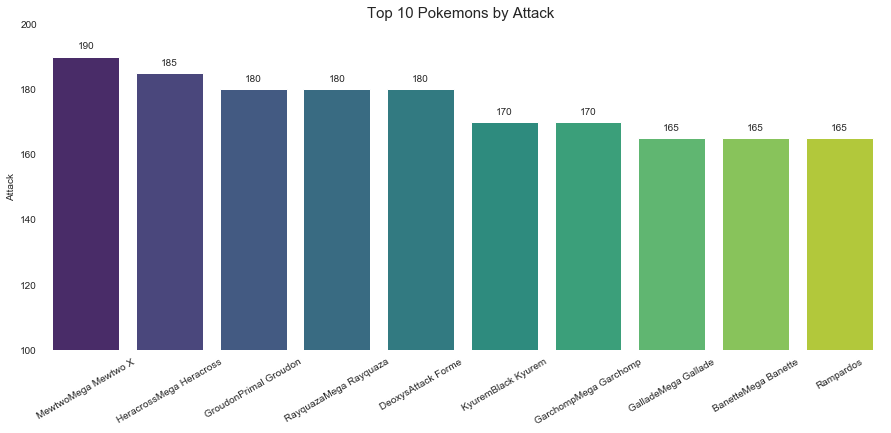

In [28]:
#data[['Name','Attack']].sort_values(by='Attack',ascending=False).head(10)
plt.figure(figsize=(15,6))
ax02 = sns.barplot(x=data[['Name','Attack']].sort_values(by='Attack',ascending=False).head(10)['Name'],
            y=data[['Name','Attack']].sort_values(by='Attack',ascending=False).head(10)['Attack'],palette='viridis')
sns.despine(bottom=True,left=True)
ax02.set_xlabel('');
ax02.set_ylim(100,200)
plt.xticks(rotation=30)
for p in ax02.patches:
    ax02.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                 va='center', xytext=(0, 10), textcoords='offset points')
ax02.set_title('Top 10 Pokemons by Attack ', fontsize=15);

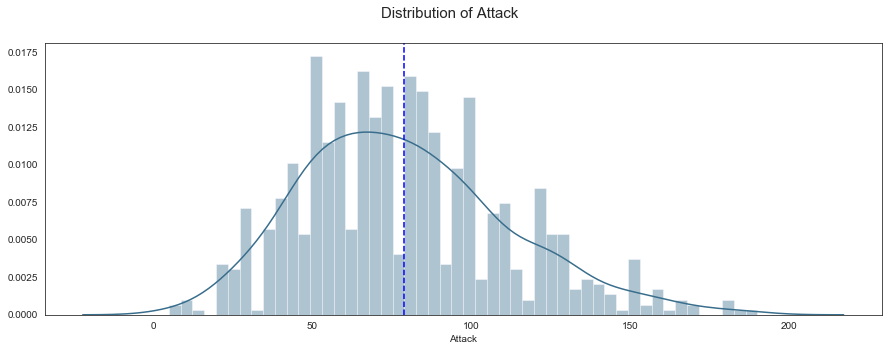

In [29]:
f,ax = plt.subplots(figsize=(15,5))
h0 = sns.distplot(data['Attack'],color='#386d8c',bins=50)
plt.axvline(data['Attack'].mean(),linestyle='dashed',color='b')
plt.suptitle('Distribution of Attack',fontsize=15);

,count,mean,std,min,25%,50%,75%,max
Attack,800.0,79.00125,32.457366,5.0,55.0,75.0,100.0,190.0


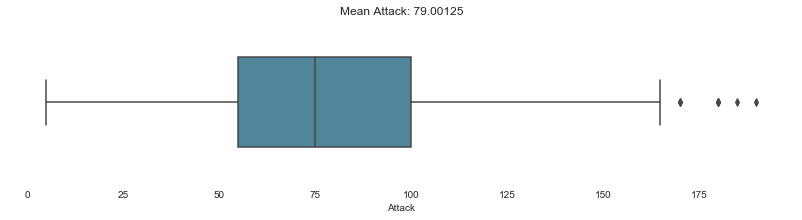

In [30]:
plt.figure(figsize=(14,3));
sns.boxplot(data['Attack'],palette=['#458ba5'],width=0.55);
plt.title(f"Mean Attack: {str(data['Attack'].mean())}",fontsize=12);
sns.despine(bottom=True,left=True)  
pd.DataFrame(data['Attack'].describe()).T

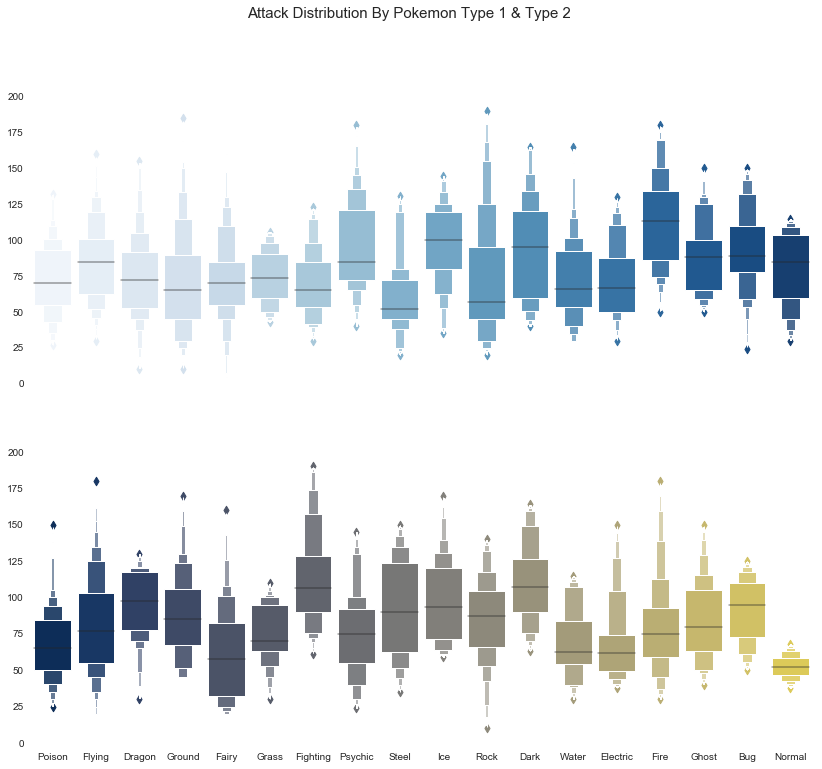

In [31]:
f,ax = plt.subplots(2,1,figsize=(14,12),sharex=True)
att1 = sns.boxenplot(y=data['Attack'],x=data['Type 1'],palette='Blues',width=0.85,ax=ax[0]);
att1.set_ylabel('');
att1.set_xlabel('');
sns.despine(bottom=True,left=True)
plt.suptitle('Attack Distribution By Pokemon Type 1 & Type 2',fontsize=15);
att2 = sns.boxenplot(y=data['Attack'],x=data['Type 2'],palette='cividis',width=0.85,ax=ax[1]);
att2.set_ylabel('');
att2.set_xlabel('');
sns.despine(bottom=True,left=True)

In [32]:
pd.DataFrame(data.groupby('Type 1')['Attack'].mean()).T

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Attack,70.971014,88.387097,112.125,69.090909,61.529412,96.777778,84.769231,78.75,73.78125,73.214286,95.75,72.75,73.469388,74.678571,71.45614,92.863636,92.703704,74.151786


In [33]:
pd.DataFrame(data.groupby('Type 2')['Attack'].mean()).T

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Attack,90.0,109.8,94.444444,72.666667,61.608696,112.846154,81.25,80.28866,84.142857,74.16,89.857143,98.0,52.75,67.588235,74.69697,84.0,92.590909,70.142857


In [34]:
attack1 = data.groupby(['Type 1'])['Attack'].mean().reset_index().rename(columns={'Type 1':'Type','Attack':'Main'})
attack2 = data.groupby(['Type 2'])['Attack'].mean().reset_index().rename(columns={'Type 2':'Type','Attack':'Secondary'})
merged_attack = pd.merge(attack1, attack2,on='Type')
mat = merged_attack.melt(id_vars='Type')
mat = mat.sort_values(by=['value','variable'],ascending=False).rename(columns={'variable':'Kind'})

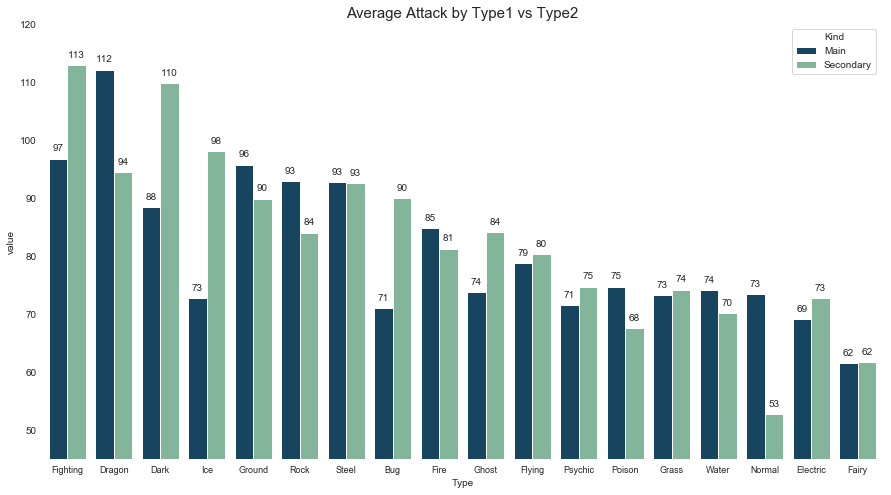

In [35]:
plt.figure(figsize=(15,8))
b = sns.barplot(y='value',x='Type',hue='Kind',data=mat,palette=['#0B486B','#79BD9A','#B5838D'],
               hue_order=['Main','Secondary'])
plt.xticks(fontsize=9)
b.set_ylim(45,120);
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Average Attack by Type1 vs Type2',fontsize=15);
for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                 va='center', xytext=(0, 10), textcoords='offset points')

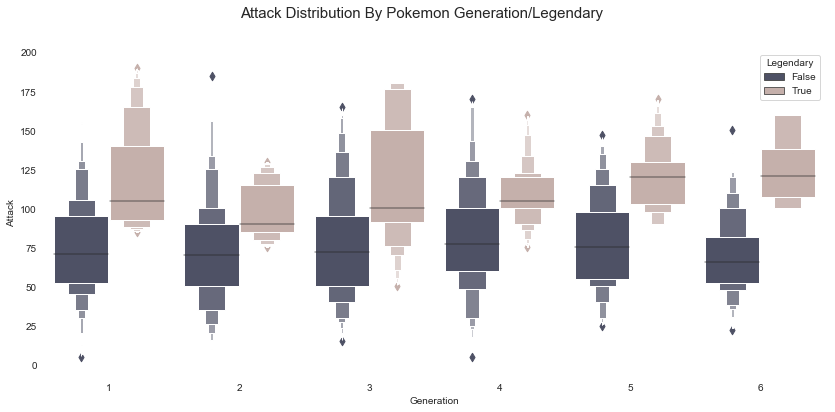

In [36]:
plt.figure(figsize=(14,6))
sns.boxenplot(y=data['Attack'],x=data['Generation'],palette=['#4A4E69','#C9ADA7','#B5838D'],width=0.85,hue=data['Legendary']);
sns.despine(bottom=True,left=True)
plt.suptitle('Attack Distribution By Pokemon Generation/Legendary',fontsize=15);

### Analysis of Pokemon Defense

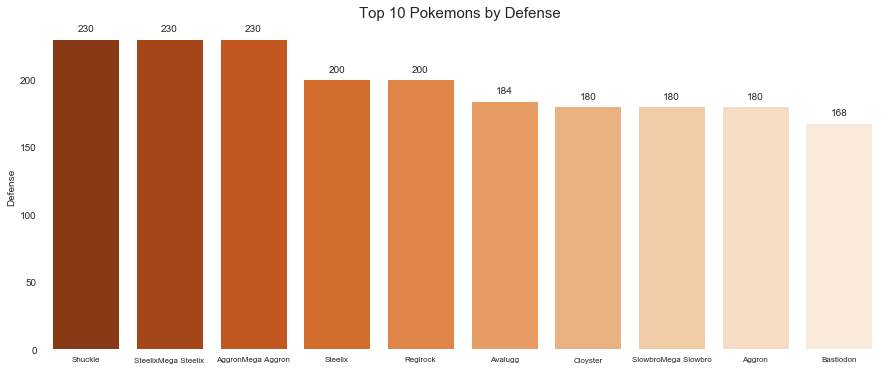

In [37]:
#data[['Name','Attack']].sort_values(by='Attack',ascending=False).head(10)
plt.figure(figsize=(15,6))
ax03 = sns.barplot(x=data[['Name','Defense']].sort_values(by='Defense',ascending=False).head(10)['Name'],
            y=data[['Name','Defense']].sort_values(by='Defense',ascending=False).head(10)['Defense'],palette='Oranges_r')
sns.despine(bottom=True,left=True)
ax03.set_xlabel('');
plt.xticks(fontsize=8)
for p in ax03.patches:
    ax03.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                 va='center', xytext=(0, 10), textcoords='offset points')
ax03.set_title('Top 10 Pokemons by Defense ', fontsize=15);

,count,mean,std,min,25%,50%,75%,max
Defense,800.0,73.8425,31.183501,5.0,50.0,70.0,90.0,230.0


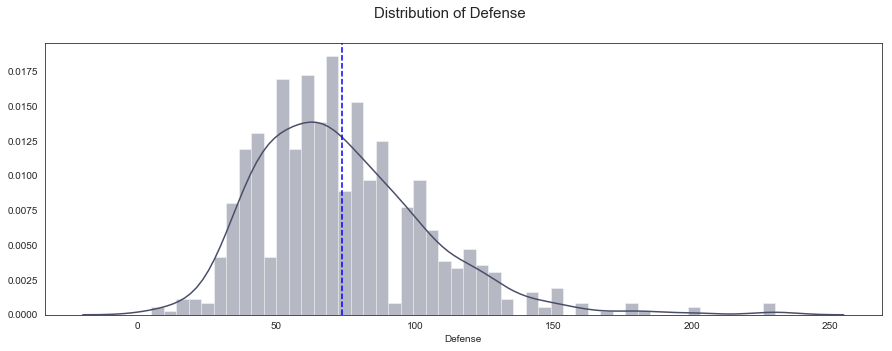

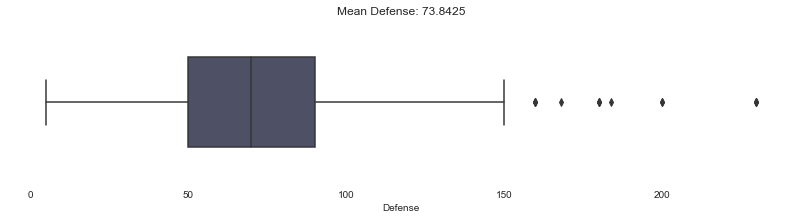

In [38]:
f,ax = plt.subplots(figsize=(15,5))
h0 = sns.distplot(data['Defense'],color='#4A4E69',bins=50)
plt.axvline(data['Defense'].mean(),linestyle='dashed',color='b')
plt.suptitle('Distribution of Defense',fontsize=15);
plt.figure(figsize=(14,3));
sns.boxplot(data['Defense'],palette=['#4A4E69'],width=0.55);
plt.title(f"Mean Defense: {str(data['Defense'].mean())}",fontsize=12);
sns.despine(bottom=True,left=True)  
pd.DataFrame(data['Defense'].describe()).T

In [39]:
def1 = data.groupby(['Type 1'])['Defense'].mean().reset_index().rename(columns={'Type 1':'Type','Defense':'Main'})
def2 = data.groupby(['Type 2'])['Defense'].mean().reset_index().rename(columns={'Type 2':'Type','Defense':'Secondary'})
merged_def = pd.merge(def1, def2,on='Type')
deff = merged_def.melt(id_vars='Type')
deff = deff.sort_values(by=['value','variable'],ascending=False).rename(columns={'variable':'Kind'})

In [40]:
deff.T

,33,16,34,15,28,20,32,2,29,35,10,23,26,8,24,27,18,22,17,19,11,9,0,1,13,21,25,6,14,3,7,5,4,12,31,30
Type,Rock,Steel,Steel,Rock,Ground,Dragon,Psychic,Dragon,Ice,Water,Ground,Fighting,Ghost,Ghost,Fire,Grass,Bug,Fairy,Water,Dark,Ice,Grass,Bug,Dark,Poison,Electric,Flying,Fire,Psychic,Electric,Flying,Fighting,Fairy,Normal,Poison,Normal
Kind,Secondary,Main,Secondary,Main,Secondary,Secondary,Secondary,Main,Secondary,Secondary,Main,Secondary,Secondary,Main,Secondary,Secondary,Secondary,Secondary,Main,Secondary,Main,Main,Main,Main,Main,Secondary,Secondary,Main,Main,Main,Main,Main,Main,Main,Secondary,Secondary
value,126.857,126.37,104.636,100.795,90.3143,87.0556,87.0303,86.375,85.6429,85.0714,84.8438,82.5,82.2857,81.1875,80.1667,80.12,80,73.8696,72.9464,72.05,71.4167,70.8,70.7246,70.2258,68.8214,68.3333,68.3093,67.7692,67.6842,66.2955,66.25,65.9259,65.7059,59.8469,59.5588,53.75


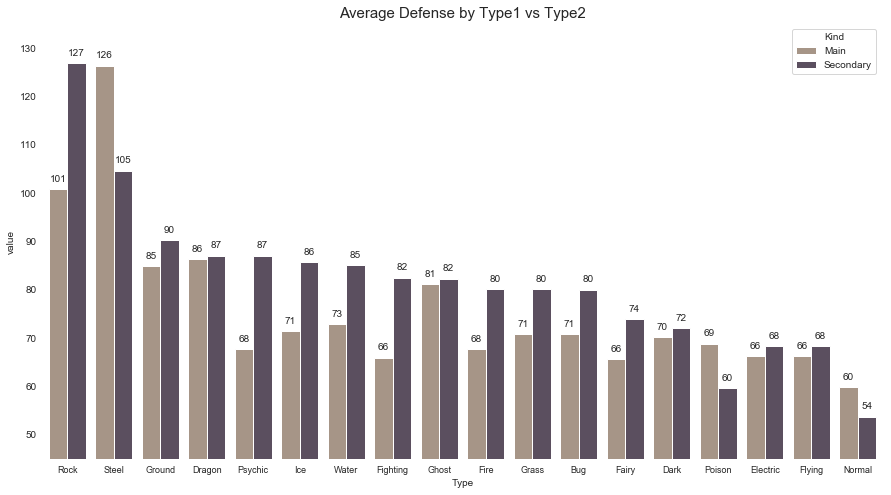

In [41]:
plt.figure(figsize=(15,8))
c = sns.barplot(y='value',x='Type',hue='Kind',data=deff,palette=['#ab9582','#5c4c62','#B5838D'],
               hue_order=['Main','Secondary'])
plt.xticks(fontsize=9)
c.set_ylim(45,135);
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Average Defense by Type1 vs Type2',fontsize=15);
for p in c.patches:
    c.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                 va='center', xytext=(0, 10), textcoords='offset points')

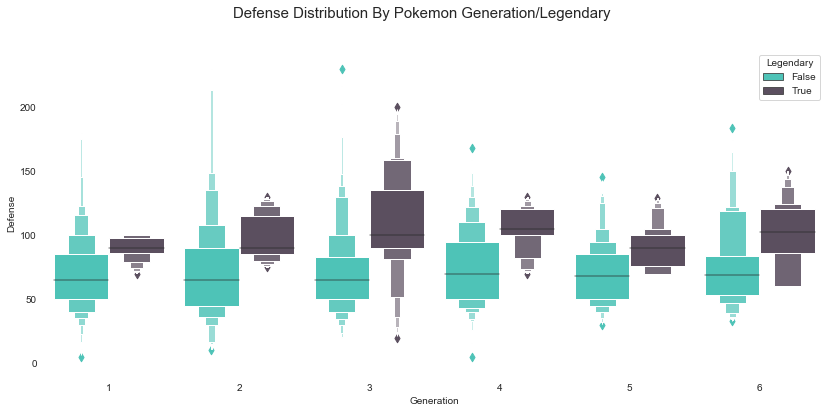

In [42]:
plt.figure(figsize=(14,6))
sns.boxenplot(y=data['Defense'],x=data['Generation'],palette=['#3bd6c6','#5c4c62','#B5838D'],width=0.85,hue=data['Legendary']);
sns.despine(bottom=True,left=True)
plt.suptitle('Defense Distribution By Pokemon Generation/Legendary',fontsize=15);

### Speed Analysis 

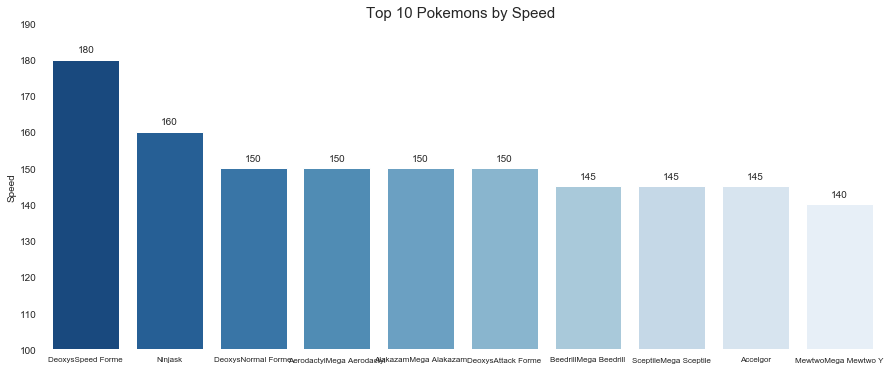

In [43]:
plt.figure(figsize=(15,6))
ax02 = sns.barplot(x=data[['Name','Speed']].sort_values(by='Speed',ascending=False).head(10)['Name'],
            y=data[['Name','Speed']].sort_values(by='Speed',ascending=False).head(10)['Speed'],palette='Blues_r')
sns.despine(bottom=True,left=True)
ax02.set_xlabel('');
ax02.set_ylim(100,190)
plt.xticks(fontsize=8)
for p in ax02.patches:
    ax02.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                 va='center', xytext=(0, 10), textcoords='offset points')
ax02.set_title('Top 10 Pokemons by Speed ', fontsize=15);

,count,mean,std,min,25%,50%,75%,max
Speed,800.0,68.2775,29.060474,5.0,45.0,65.0,90.0,180.0


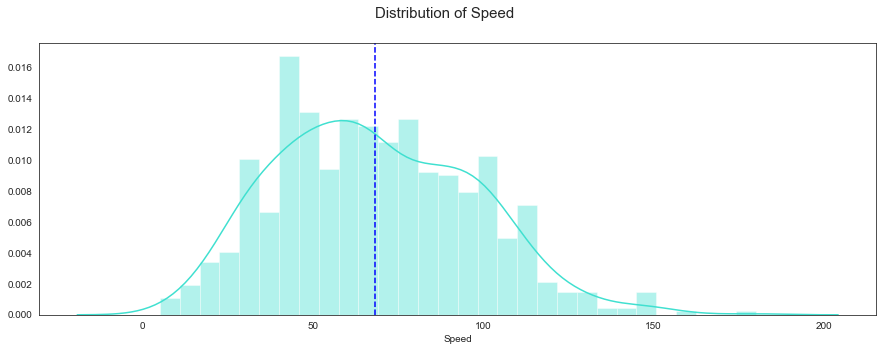

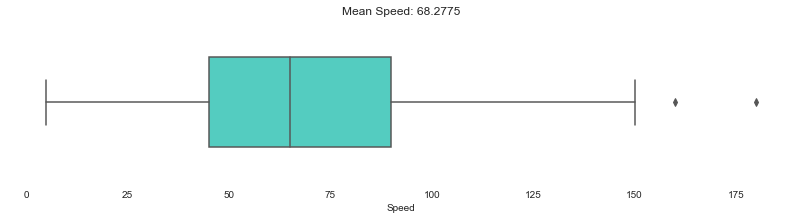

In [44]:
f,ax = plt.subplots(figsize=(15,5))
h0 = sns.distplot(data['Speed'],color='#40e0d0',bins=30)
plt.axvline(data['Speed'].mean(),linestyle='dashed',color='b')
plt.suptitle('Distribution of Speed',fontsize=15);
plt.figure(figsize=(14,3));
sns.boxplot(data['Speed'],palette=['#40e0d0'],width=0.55);
plt.title(f"Mean Speed: {str(data['Speed'].mean())}",fontsize=12);
sns.despine(bottom=True,left=True)  
pd.DataFrame(data['Speed'].describe()).T

In [45]:
sp1 = data.groupby(['Type 1'])['Speed'].mean().reset_index().rename(columns={'Type 1':'Type','Speed':'Main'})
sp2 = data.groupby(['Type 2'])['Speed'].mean().reset_index().rename(columns={'Type 2':'Type','Speed':'Secondary'})
sp_def = pd.merge(sp1, sp2,on='Type')
sp = merged_def.melt(id_vars='Type')
sp = sp.sort_values(by=['value','variable'],ascending=False).rename(columns={'variable':'Kind'})

In [46]:
sp.T

,33,16,34,15,28,20,32,2,29,35,10,23,26,8,24,27,18,22,17,19,11,9,0,1,13,21,25,6,14,3,7,5,4,12,31,30
Type,Rock,Steel,Steel,Rock,Ground,Dragon,Psychic,Dragon,Ice,Water,Ground,Fighting,Ghost,Ghost,Fire,Grass,Bug,Fairy,Water,Dark,Ice,Grass,Bug,Dark,Poison,Electric,Flying,Fire,Psychic,Electric,Flying,Fighting,Fairy,Normal,Poison,Normal
Kind,Secondary,Main,Secondary,Main,Secondary,Secondary,Secondary,Main,Secondary,Secondary,Main,Secondary,Secondary,Main,Secondary,Secondary,Secondary,Secondary,Main,Secondary,Main,Main,Main,Main,Main,Secondary,Secondary,Main,Main,Main,Main,Main,Main,Main,Secondary,Secondary
value,126.857,126.37,104.636,100.795,90.3143,87.0556,87.0303,86.375,85.6429,85.0714,84.8438,82.5,82.2857,81.1875,80.1667,80.12,80,73.8696,72.9464,72.05,71.4167,70.8,70.7246,70.2258,68.8214,68.3333,68.3093,67.7692,67.6842,66.2955,66.25,65.9259,65.7059,59.8469,59.5588,53.75


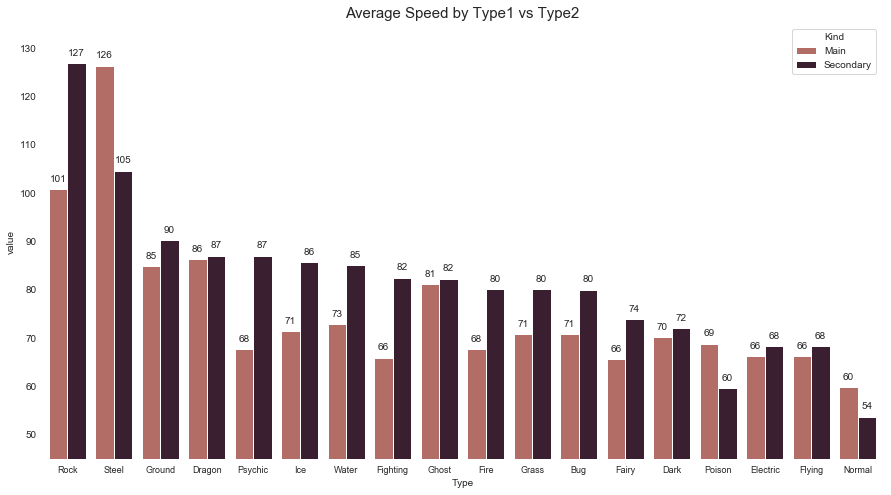

In [47]:
plt.figure(figsize=(15,8))
d = sns.barplot(y='value',x='Type',hue='Kind',data=sp,palette=['#BE635B','#3D1B30','#B5838D'],
               hue_order=['Main','Secondary'])
plt.xticks(fontsize=9)
d.set_ylim(45,135);
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.title('Average Speed by Type1 vs Type2',fontsize=15);
for p in d.patches:
    d.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                 va='center', xytext=(0, 10), textcoords='offset points')

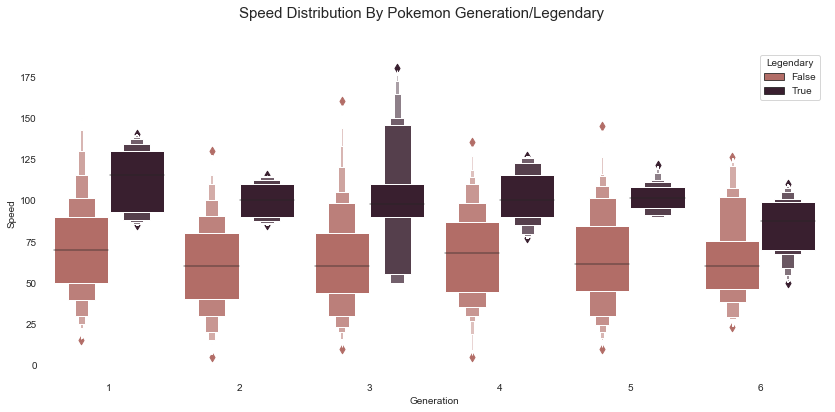

In [48]:
plt.figure(figsize=(14,6))
sns.boxenplot(y=data['Speed'],x=data['Generation'],palette=['#BE635B','#3D1B30','#B5838D'],width=0.85,hue=data['Legendary']);
sns.despine(bottom=True,left=True)
plt.suptitle('Speed Distribution By Pokemon Generation/Legendary',fontsize=15);

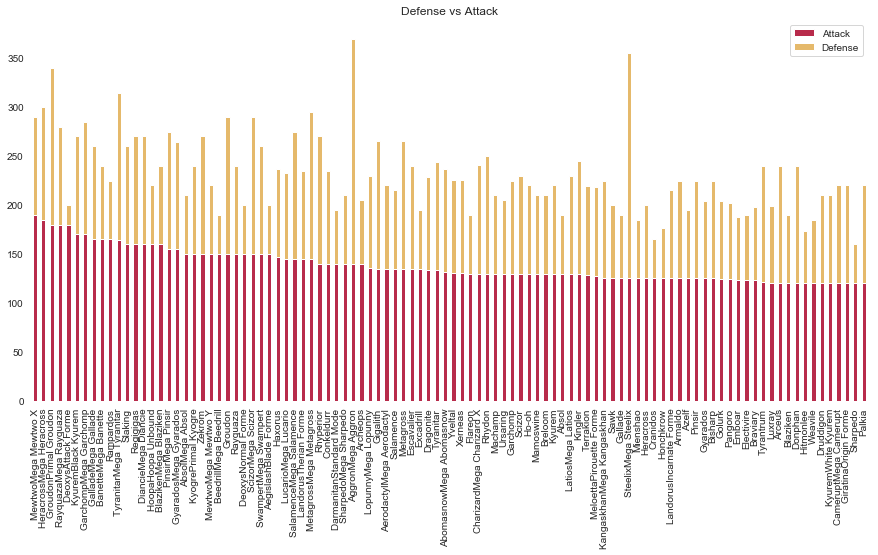

In [51]:
data[['Name','Attack','Defense']].sort_values(by='Attack',
                                              ascending=False).head(100).set_index('Name').plot.bar(stacked=True,
                                                                                                   figsize=(15,7),
                                                                                                  color=['#b82b4b','#E5B96B']);
sns.despine(left=True,bottom=True);
plt.title('Defense vs Attack');
plt.xlabel('');

In [83]:
data.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


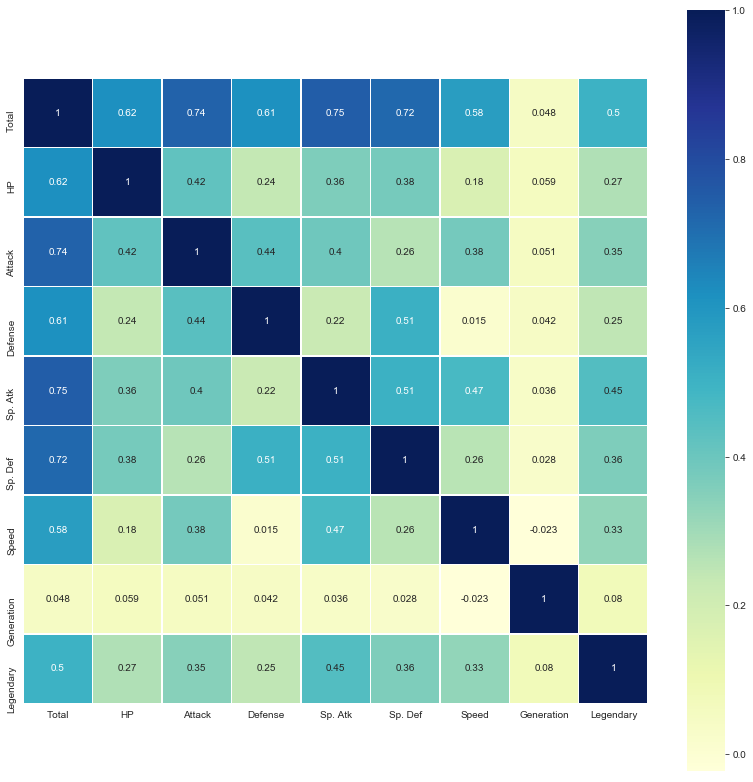

In [99]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(),annot=True,square=True,cmap='YlGnBu',linewidths=.5);

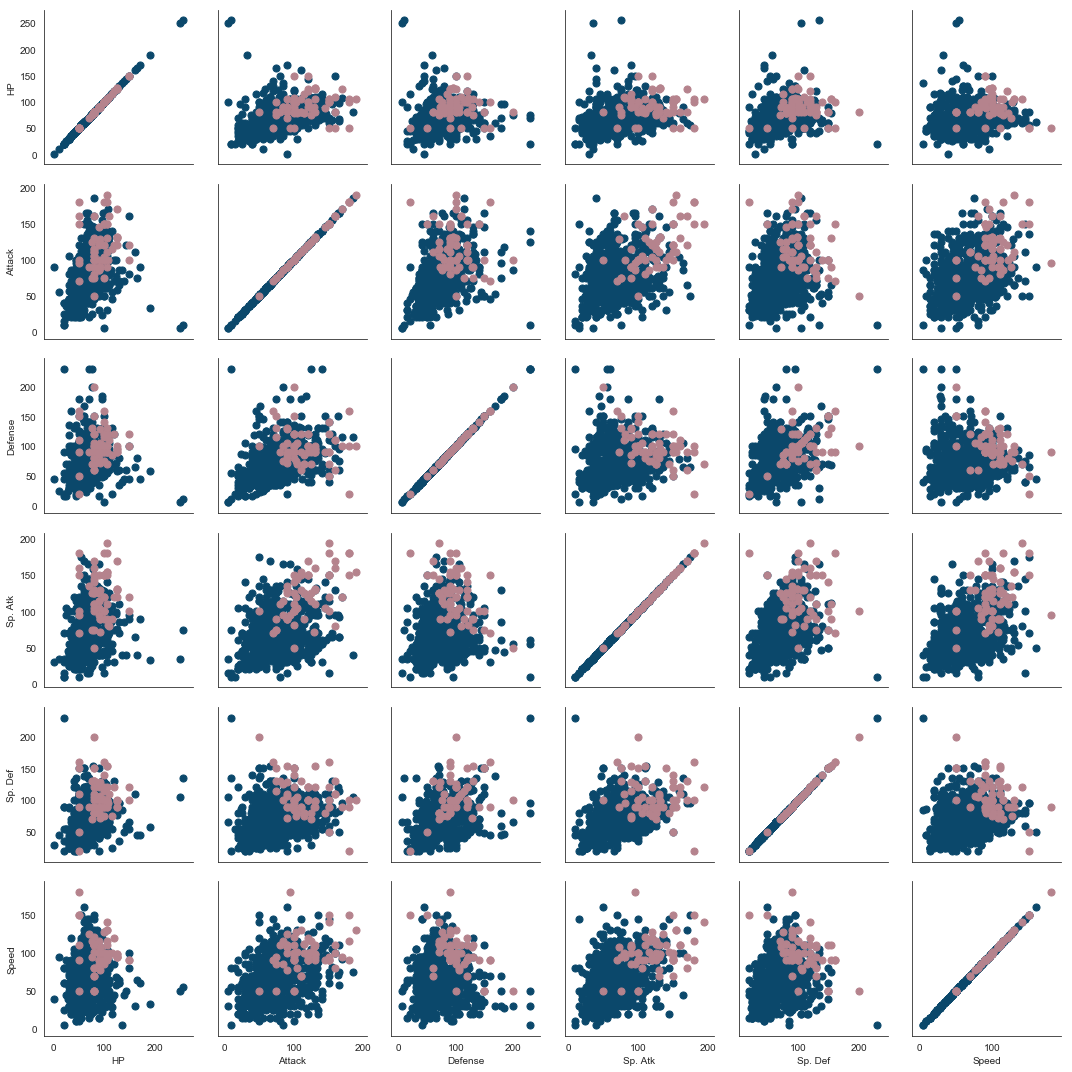

In [110]:
g = sns.PairGrid(data, vars=['HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed'], hue="Legendary",palette=['#0B486B','#B5838D'])
g.map(plt.scatter,s=50);